100% |#######################################################################################################################################################|


Took 6.246079683303833

 Effective focal distance of the axicon: 47.2 cm


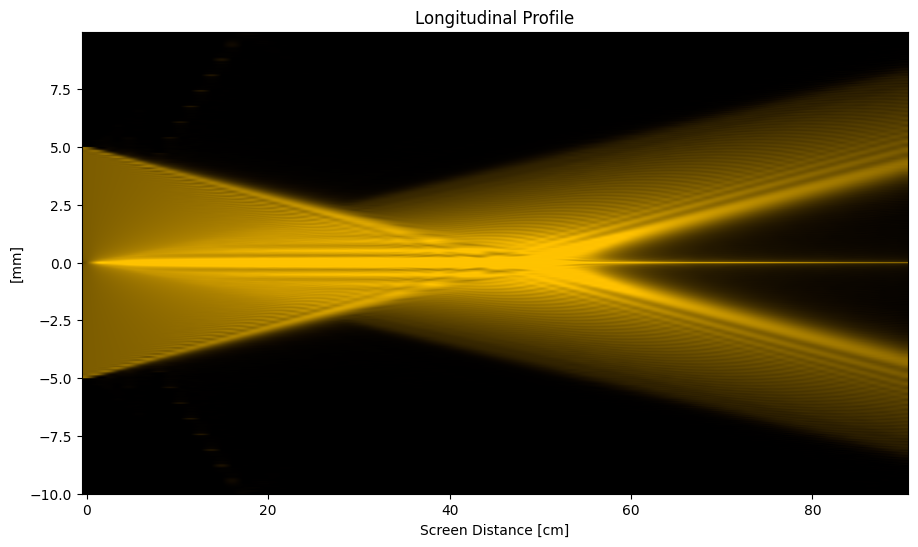

In [1]:
# axicon_longitudinal_profile.py

import diffractsim
diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration
# Note: this example is highly recommendeded to run with CUDA

from diffractsim import MonochromaticField, nm, mm, cm, Axicon, bd


F = MonochromaticField(
    wavelength = 578 * nm, extent_x=20. * mm, extent_y=20. * mm, Nx=2048, Ny=2048, intensity =0.005
)

"""
The axicon that creates a beam with an approximate Bessel function profile.
"""

F.add(Axicon(period = 0.06*mm, radius = 5*mm))


end_distance = 90 *cm
steps = 80 
longitudinal_profile_rgb, longitudinal_profile_E, extent = F.get_longitudinal_profile( start_distance = 0*cm , end_distance = end_distance , steps = steps) 

#measure the position of the intensity maximum
longitudinal_profile_E = longitudinal_profile_E[:, 1024]
index = bd.argmax(bd.abs(longitudinal_profile_E))
print('\n Effective focal distance of the axicon: {} cm'.format("%.1f"  % (index * end_distance / steps / cm)))

#plot colors
F.plot_longitudinal_profile_colors(longitudinal_profile_rgb = longitudinal_profile_rgb, extent = extent)

100% |#######################################################################################################################################################|


Computation Took 6.499825477600098


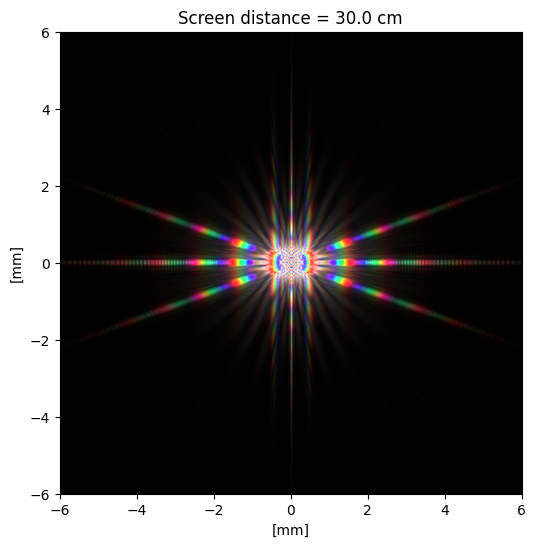

In [2]:
# bahtinov_mask.py

import diffractsim
diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import PolychromaticField, Lens, ApertureFromImage, cf, nm, mm, cm

F = PolychromaticField(
    spectrum = 4*cf.illuminant_d65, 
    extent_x=15. * mm, extent_y=15. * mm, 
    Nx=1500, Ny=1500
)

F.add(ApertureFromImage("./examples/apertures/bahtinov_mask.jpg", image_size=(5. * mm, 5 * mm), simulation = F))

F.add(Lens(f = 30*cm))
F.propagate(z=30*cm)

rgb =F.get_colors()
F.plot_colors(rgb, xlim=[-6* mm, 6* mm], ylim=[-6* mm, 6* mm])


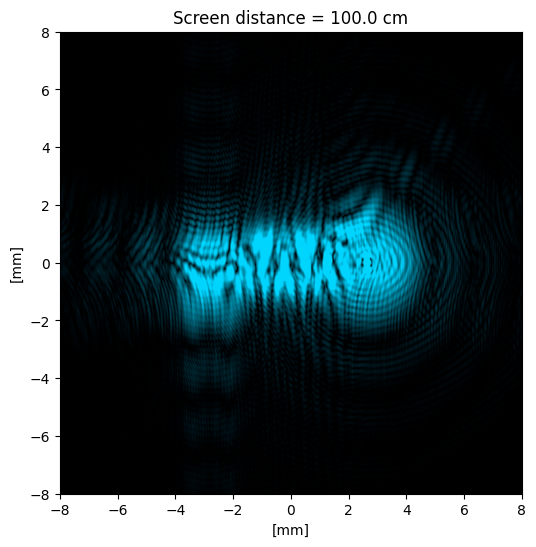

In [3]:
# beyond_the_focal_length.py

import diffractsim
diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import MonochromaticField, ApertureFromImage, Lens, nm, mm, cm

F = MonochromaticField(
    wavelength=488 * nm, extent_x=27. * mm, extent_y=27. * mm, Nx=2000, Ny=2000,intensity = 0.2
)

F.add(ApertureFromImage("./examples/apertures/QWT.png", image_size=(15 * mm, 15 * mm), simulation = F))

F.add(Lens(f = 50*cm))
F.propagate(100*cm)

rgb = F.get_colors()
F.plot_colors(rgb, xlim=[-8*mm,8*mm], ylim=[-8*mm,8*mm])

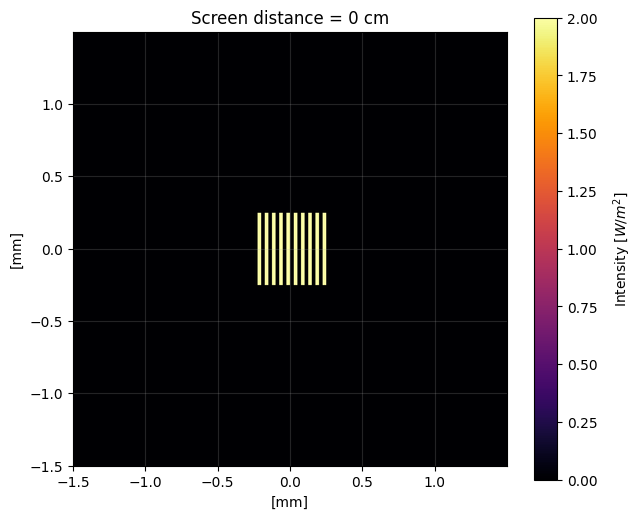

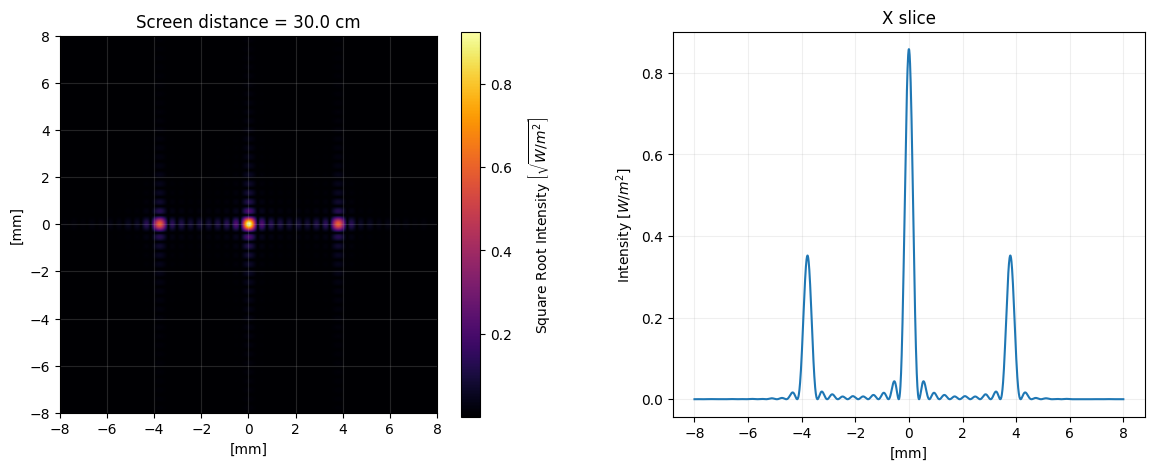

In [4]:
# binary_grating.py

import diffractsim
diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import MonochromaticField, nm, mm, cm, BinaryGrating, Lens

F = MonochromaticField(
    wavelength = 632.8 * nm, extent_x=3. * mm, extent_y=3. * mm, Nx=2048, Ny=2048, intensity =2.
)


F.add(BinaryGrating(width = 0.5*mm, height = 0.5*mm, period = 0.05 *mm))


# plot the grating
I = F.get_intensity()
F.plot_intensity(I, grid = True, units = mm)

F.add(Lens(f = 30*cm))
F.zoom_propagate(30*cm, x_interval = [-8*mm, 8*mm], y_interval = [-8*mm,8*mm])

# plot the diffraction pattern
I = F.get_intensity()
F.plot_intensity(I, square_root = True, units = mm, grid = True, figsize = (14,5), slice_y_pos = 0*mm)


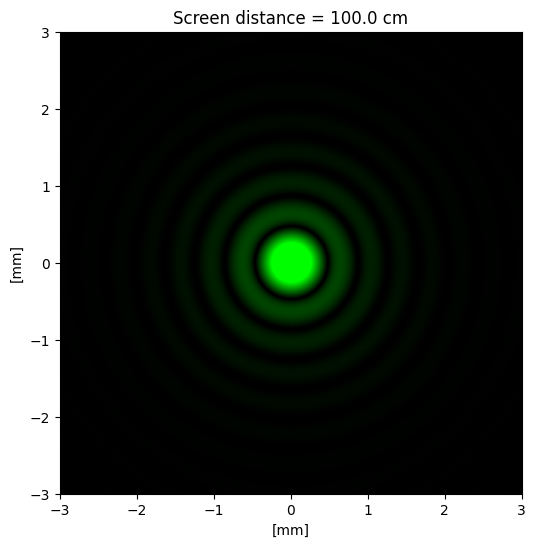

In [5]:
# circular_aperture_lens.py

import diffractsim
diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import MonochromaticField, nm, mm, cm, CircularAperture, Lens

F = MonochromaticField(
    wavelength = 543 * nm, extent_x=13. * mm, extent_y=13. * mm, Nx=2000, Ny=2000, intensity =0.01
)

F.add(CircularAperture(radius = 0.7*mm))

F.add(Lens(f = 100*cm)) # Just remove this command to see the pattern without lens
F.propagate(100*cm)

rgb = F.get_colors()
F.plot_colors(rgb, xlim=[-3*mm,3*mm], ylim=[-3*mm,3*mm])


100% |#######################################################################################################################################################|


Computation Took 4.9173572063446045


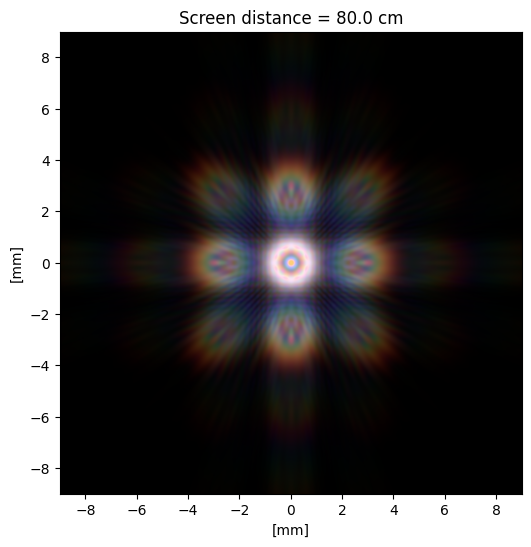

In [6]:
# circular_grating.py

import diffractsim
diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import PolychromaticField, ApertureFromImage, Lens, cf, mm, cm

F = PolychromaticField(
    spectrum=3.5 * cf.illuminant_d65,
    extent_x=26.0 * mm,
    extent_y=26.0 * mm,
    Nx=1200,
    Ny=1200,
    spectrum_size = 200, spectrum_divisions = 40  # increase these values to improve color resolution
)

F.add(ApertureFromImage("./examples/apertures/circular_grating.jpg", image_size=(14 * mm, 14 * mm), simulation = F))

F.propagate(80*cm)
rgb =F.get_colors()

F.plot_colors(rgb, xlim=[-9*mm, 9*mm], ylim=[-9*mm, 9*mm])


100% |#######################################################################################################################################################|


Computation Took 6.049509763717651


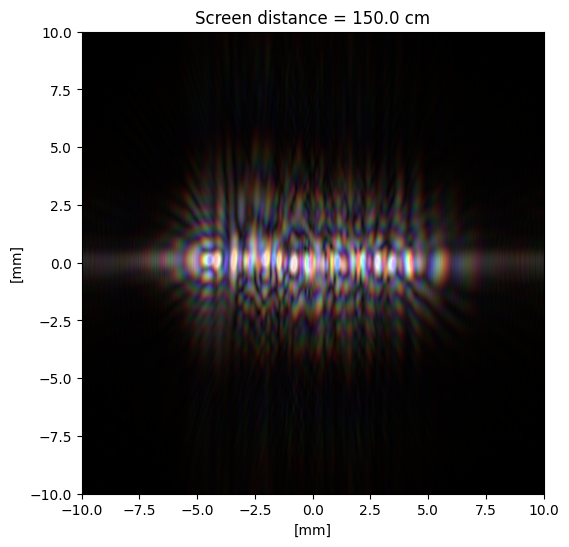

In [7]:
# diffraction_text.py

import diffractsim
diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import PolychromaticField,ApertureFromImage, cf, mm, cm

F = PolychromaticField(
    spectrum=1.5 * cf.illuminant_d65,
    extent_x=20 * mm,
    extent_y=20 * mm,
    Nx=1600,
    Ny=1600,
)

F.add(ApertureFromImage("./examples/apertures/diffraction_text.jpg", image_size=(15 * mm, 15 * mm), simulation = F))


F.propagate(z=150*cm)
rgb = F.get_colors()

F.plot_colors(rgb, xlim=[-10*mm, 10*mm], ylim=[-10*mm, 10*mm])


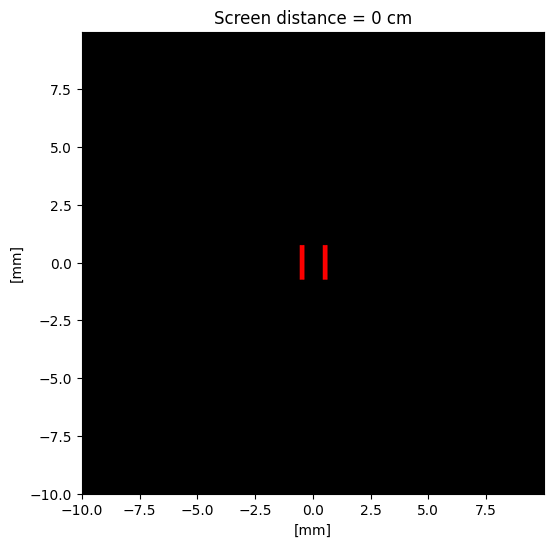

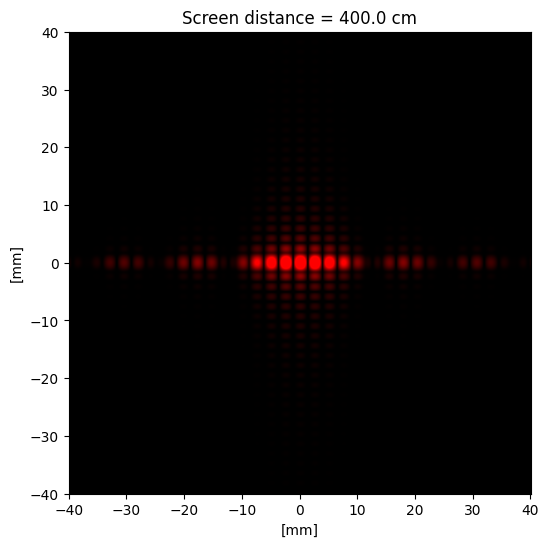

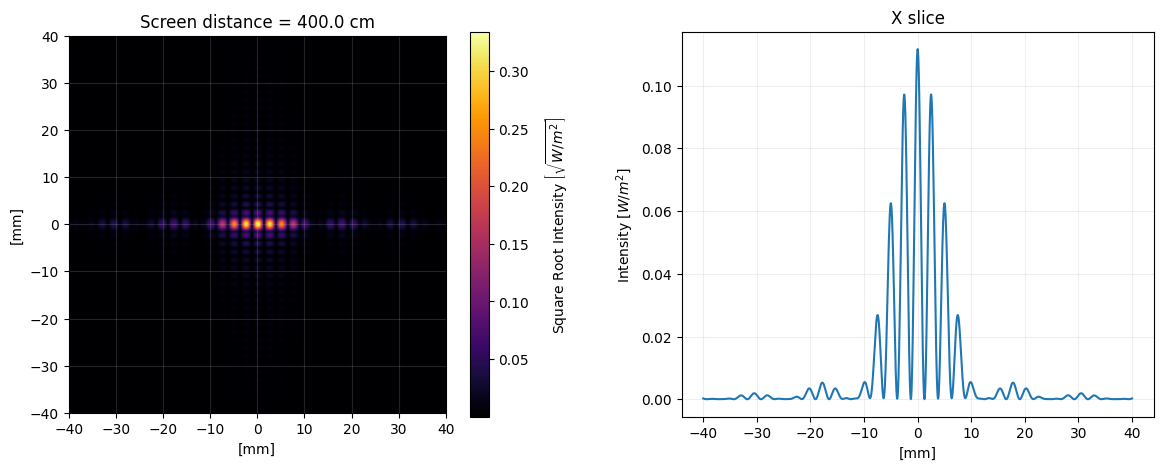

In [8]:
# double_slit_interference.py

import diffractsim
diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import MonochromaticField, nm, mm, cm, RectangularSlit

F = MonochromaticField(
    wavelength = 632.8 * nm, extent_x=20. * mm, extent_y=20. * mm, Nx=2048, Ny=2048, intensity =2.
)


D = 1 * mm  #slits separation
F.add(RectangularSlit(width = 0.2*mm, height = 1.5*mm, x0 = -D/2 , y0 = 0)   +   RectangularSlit(width = 0.2*mm, height = 1.5*mm, x0 = D/2, y0 = 0))



# plot the double slit
rgb = F.get_colors()
F.plot_colors(rgb) 



# propagate the field and scale the viewing extent four times: (new_extent_x = old_extent_x * 4 = 80* mm)
#F.scale_propagate(400*cm, scale_factor = 4)
F.zoom_propagate(400*cm, x_interval = [-40. * mm, 40. * mm], y_interval = [-40*mm, 40*mm])



# plot the double slit diffraction pattern colors
rgb = F.get_colors()
F.plot_colors(rgb) 



# plot the intensity
I = F.get_intensity()
F.plot_intensity(I, square_root = True, units = mm, grid = True, figsize = (14,5), slice_y_pos = 0*mm)


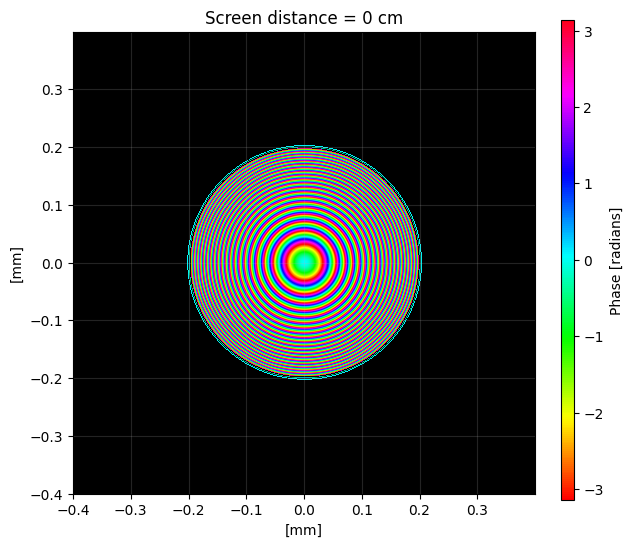

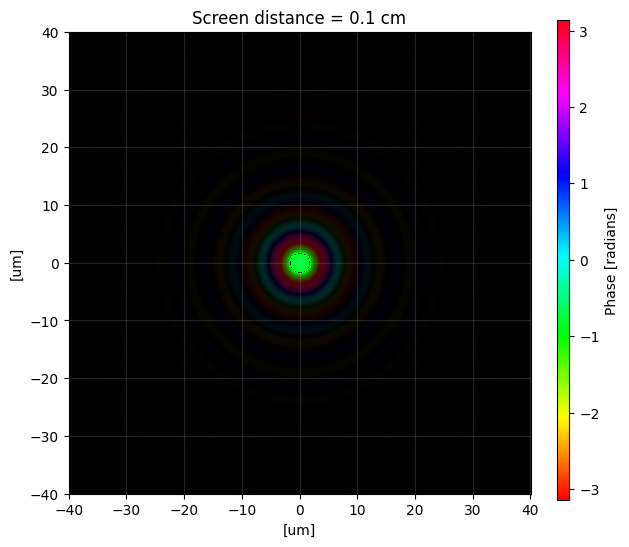

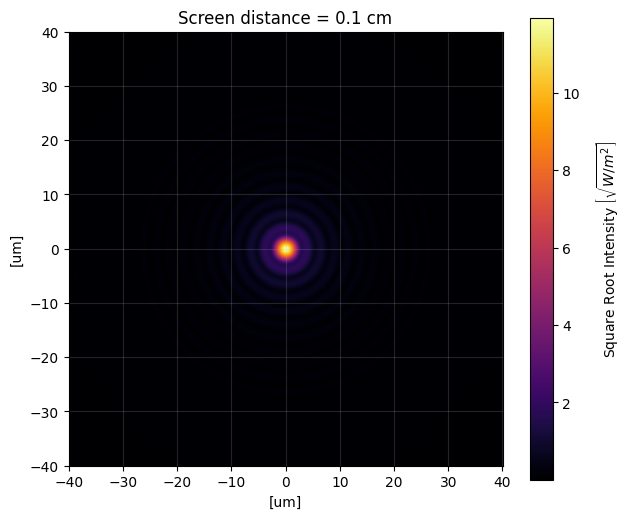

In [9]:
# fresnel_zone_plate_focus_spot.py

import diffractsim
diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import MonochromaticField, nm, mm, cm,um, FZP

F = MonochromaticField(
    wavelength = 980 * nm, extent_x= 0.8 * mm, extent_y=0.8 * mm, Nx=2048, Ny=2048, intensity =0.01
)

# add a Fresnel zone plate lens (FZP) with focal length = 1*mm
F.add(FZP(f = 1*mm,λ = 980 * nm, radius = 200*um))


#plot phase shift of the FZP
E = F.get_field()
F.plot_phase(E, grid = True, units = mm)



#propagate to the focal plane and zoom in the focus spot of the lens
F.zoom_propagate(1*mm, [-40* um, 40* um], [-40* um, 40* um])

# plot the phase in the focal plane
E = F.get_field()
F.plot_phase(E, grid = True, units = um)


# plot the intensity in the focal plane
I = F.get_intensity()
F.plot_intensity(I, square_root = True, units = um, grid = True)



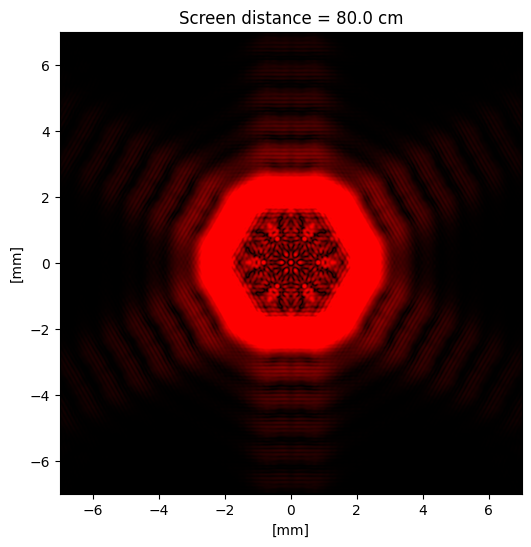

In [10]:
# hexagon_monochromatic.py

import diffractsim
diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import MonochromaticField, ApertureFromImage, mm, nm, cm

F = MonochromaticField(
    wavelength=632.8 * nm, extent_x=18 * mm, extent_y=18 * mm, Nx=1024, Ny=1024
)

F.add(ApertureFromImage("./examples/apertures/hexagon.jpg", image_size=(5.6 * mm, 5.6 * mm), simulation = F))


F.propagate(80*cm)
rgb = F.get_colors()
F.plot_colors(rgb, xlim=[-7* mm, 7* mm], ylim=[-7* mm, 7* mm])


100% |#######################################################################################################################################################|


Computation Took 2.541053533554077


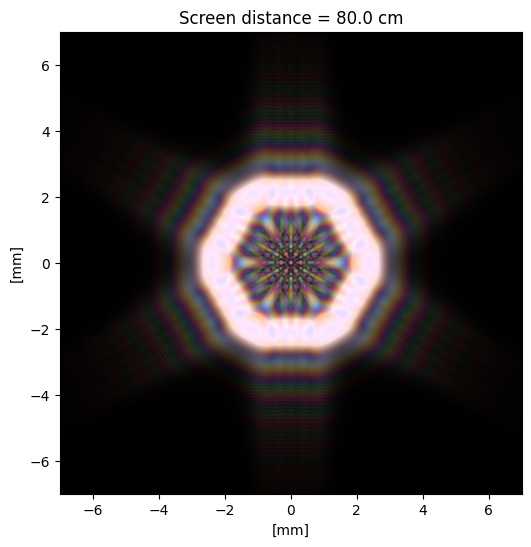

In [11]:
# hexagon_polychromatic.py

import diffractsim
diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import PolychromaticField,ApertureFromImage, cf, mm, cm

F = PolychromaticField(
    spectrum=2 * cf.illuminant_d65, extent_x=18 * mm, extent_y=18 * mm, Nx=1024, Ny=1024
)

F.add(ApertureFromImage("./examples/apertures/hexagon.jpg", image_size=(5.6 * mm, 5.6 * mm), simulation = F))

F.propagate(z=80*cm)

rgb =F.get_colors()
F.plot_colors(rgb, xlim=[-7* mm, 7* mm], ylim=[-7* mm, 7* mm])


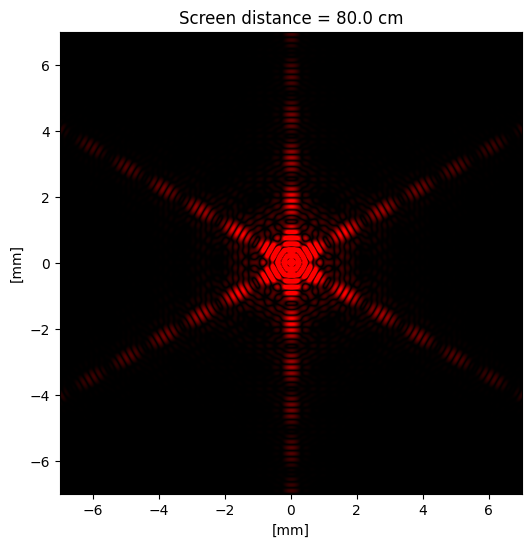

In [12]:
# hexagonal_aperture_lens.py

import diffractsim
diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import MonochromaticField, ApertureFromImage,Lens, nm, mm, cm

F = MonochromaticField(
    wavelength=632.8 * nm, extent_x=21.6 * mm, extent_y=21.6 * mm, Nx=900, Ny=900
)

F.add(ApertureFromImage("./examples/apertures/hexagon.jpg", image_size=(3.6* mm, 3.6* mm), simulation = F))

F.add(Lens(f = 80*cm)) # Just remove this command to see the pattern without lens
F.propagate(80*cm)


rgb = F.get_colors()
F.plot_colors(rgb, xlim=[-7*mm,7*mm], ylim=[-7*mm,7*mm])


100% |#######################################################################################################################################################|


Computation Took 4.497334718704224


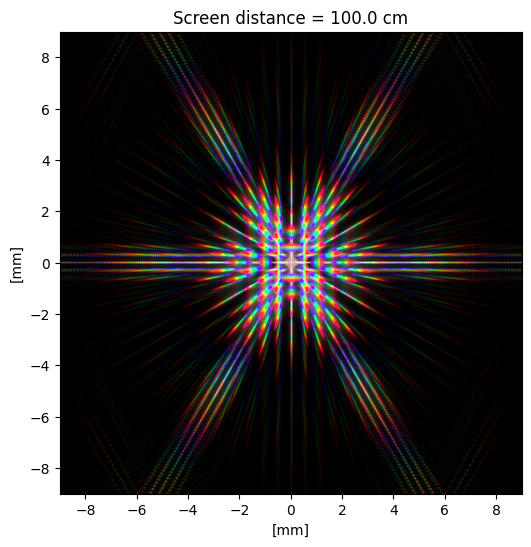

In [13]:
# hexagonal_grating.py

import diffractsim
diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import PolychromaticField, ApertureFromImage, Lens, cf, mm, cm

F = PolychromaticField(
    spectrum=2.0 * cf.illuminant_d65,
    extent_x=20.0 * mm,
    extent_y=20.0 * mm,
    Nx=1000,
    Ny=1000,
    spectrum_size = 200, spectrum_divisions = 50  # increase these values to improve color resolution
)

F.add(ApertureFromImage("./examples/apertures/hexagon_grating.jpg", image_size=(15 * mm, 15 * mm), simulation = F))

F.add(Lens(f = 100*cm))
F.propagate(z= 100*cm)

rgb =F.get_colors()
F.plot_colors(rgb, xlim=[-9*mm, 9*mm], ylim=[-9*mm, 9*mm])


100% |#######################################################################################################################################################|


Took 0.6208298206329346


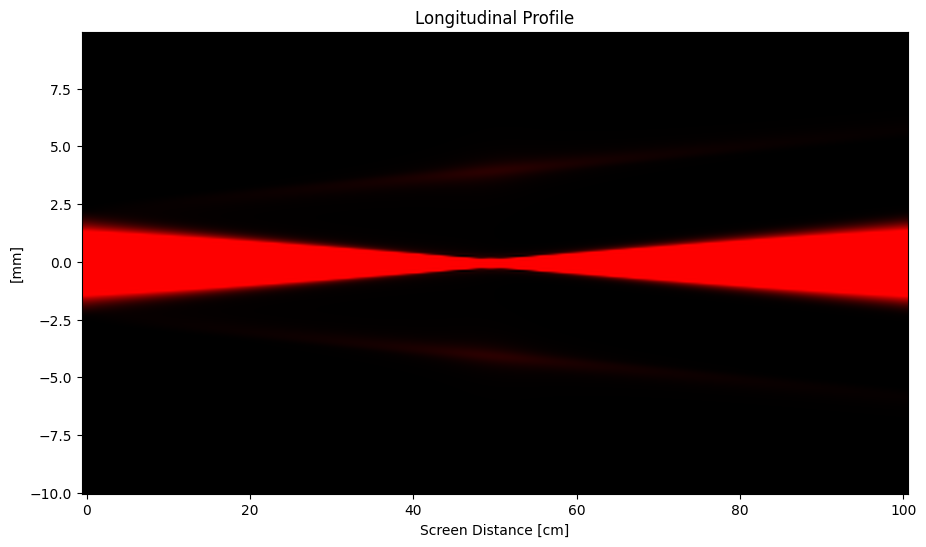

(80, 256, 3)


In [14]:
# lens_aberration.py

import diffractsim
import numpy as np  # Import numpy to use np.inf

diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration
# Note: this example is highly recommendeded to run with CUDA

from diffractsim import MonochromaticField, Lens, nm, mm, cm, GaussianBeam

F = MonochromaticField(
        wavelength=630 * nm, extent_x=20. * mm, extent_y=20. * mm, Nx=256, Ny=256, intensity=1
)
F.add(GaussianBeam(1*mm))
F.add(
    Lens(
        np.inf,  # Use np.inf instead of diffractsim.bd.Inf
        # equivalent OPD to a 50cm lens: -1/(2*f) r^2
        aberration=lambda x,y: -1/(2*50*cm) * (x**2+y**2)
    )
)

longitudinal_profile_rgb, longitudinal_profile_E, extent = F.get_longitudinal_profile(start_distance=0 * cm, end_distance=100 * cm, steps=80)
F.plot_longitudinal_profile_colors(longitudinal_profile_rgb=longitudinal_profile_rgb, extent=extent)
print(longitudinal_profile_rgb.shape)



100% |#######################################################################################################################################################|


Took 6.297245740890503


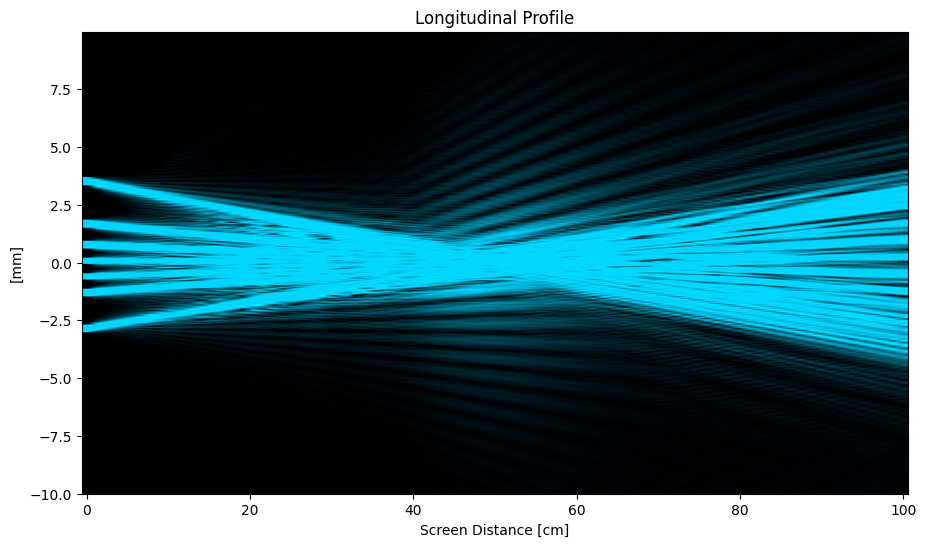

(80, 2048, 3)


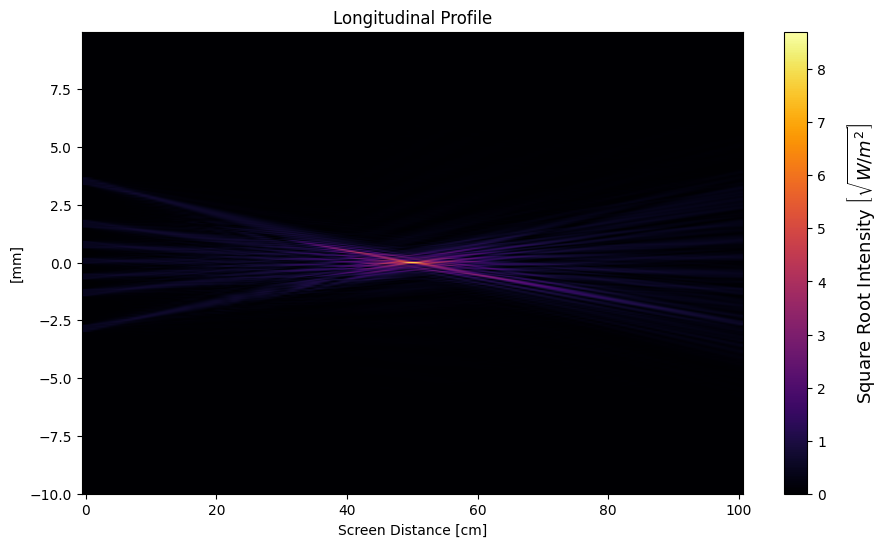

(80, 2048)


In [15]:
# lens_longitudinal_profile.py

import diffractsim
diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration
# Note: this example is highly recommendeded to run with CUDA

from diffractsim import MonochromaticField, ApertureFromImage, Lens, nm, mm, cm

F = MonochromaticField(
    wavelength=488 * nm, extent_x=20. * mm, extent_y=20. * mm, Nx=2048, Ny=2048,intensity = 0.2
)

F.add(ApertureFromImage("./examples/apertures/QWT.png",  image_size =(15 * mm, 15 * mm), simulation = F))
F.add(Lens(f = 50*cm))


longitudinal_profile_rgb, longitudinal_profile_E, extent = F.get_longitudinal_profile( start_distance = 0*cm , end_distance = 100 *cm , steps = 80) 
#plot colors
F.plot_longitudinal_profile_colors(longitudinal_profile_rgb = longitudinal_profile_rgb, extent = extent)
print(longitudinal_profile_rgb.shape)


F.plot_longitudinal_profile_intensity(longitudinal_profile_E = longitudinal_profile_E, extent = extent, square_root = True)
print(longitudinal_profile_E.shape)

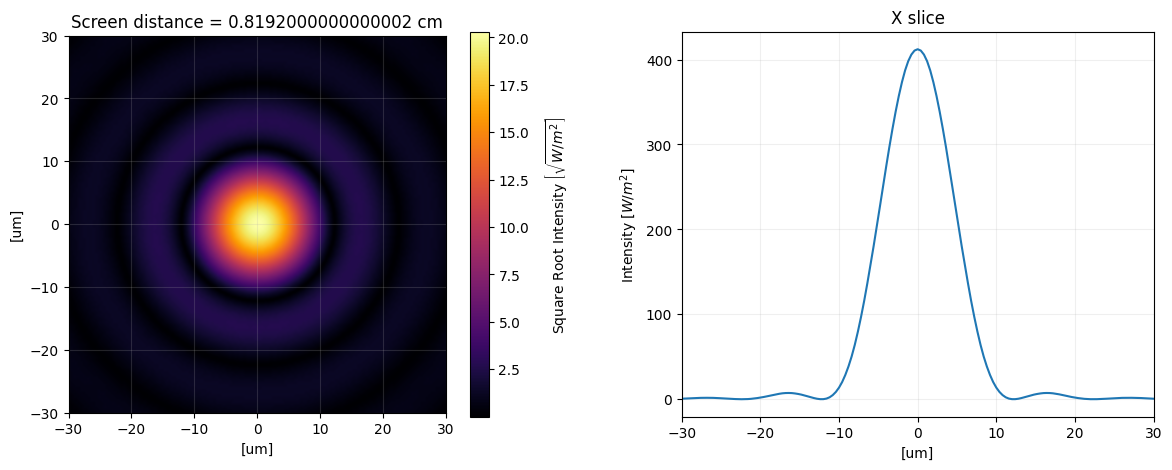

In [16]:
# lens_point_spread_function.py

import diffractsim
from diffractsim import MonochromaticField,Lens, nm, um
# Change the string to "CUDA" to use GPU acceleration
diffractsim.set_backend("CUDA")

# PARAMETERS
wlen = 1000 * nm
Nx = Ny = 2048
dx = dy = 400 * nm
focal_distance = 10 * Nx * dx  # 10 times lens diameter

# SETUP AND PROPAGATION
F = MonochromaticField(
    wavelength=wlen,
    extent_x=Nx * dx,
    extent_y=Nx * dx,
    Nx=Nx,
    Ny=Ny)

F.add(Lens(f=focal_distance, radius = Nx * dx/2))
F.propagate(focal_distance)

I = F.get_intensity()
F.plot_intensity(I, square_root = True, xlim = [-30*um, 30*um] , ylim = [-30*um, 30*um],  units = um, grid = True, figsize = (14,5), slice_y_pos = 0*um)


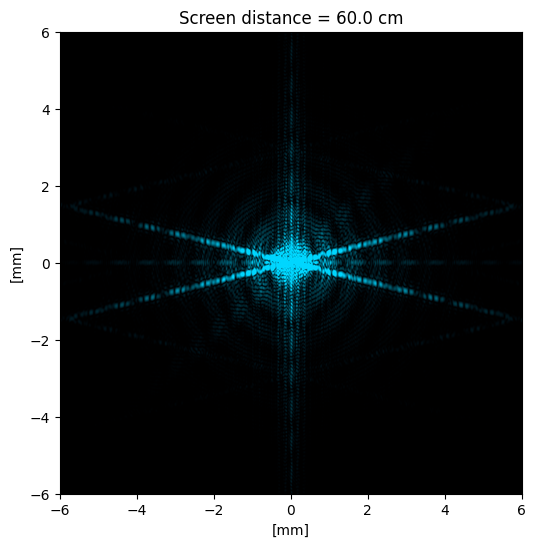

In [17]:
# object_behind_the_lens.py

import diffractsim
diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import MonochromaticField, GaussianBeam,Lens,ApertureFromImage, nm, mm, cm

F = MonochromaticField(
    wavelength=488 * nm, extent_x=19. * mm, extent_y=19. * mm, Nx=2000, Ny=2000,intensity = 0.2
)

F.add(GaussianBeam(4*mm))
F.add(Lens(f = 60*cm))
F.propagate(30*cm)

F.add(ApertureFromImage("./examples/apertures/QWT.png", image_size = (10. * mm, 10. * mm), simulation = F))
F.propagate(30*cm)


rgb = F.get_colors()
F.plot_colors(rgb, xlim=[-6.0*mm,6.0*mm], ylim=[-6.0*mm,6.0*mm])


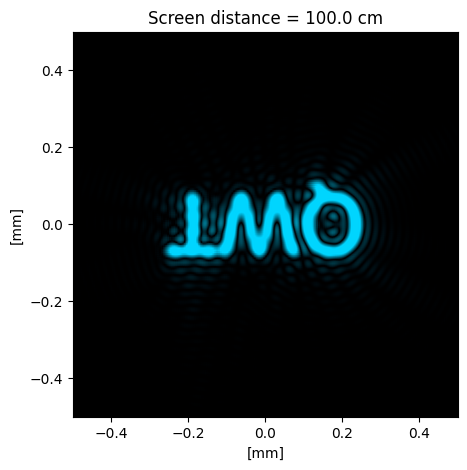

In [18]:
# optical_imaging_system.py

import diffractsim
diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import MonochromaticField, ApertureFromImage, Lens, nm, mm, cm, um


zi = 50*cm # distance from the image plane to the lens
z0 = 50*cm # distance from the lens to the current position
M = zi/z0 # magnification factor
radius = 6*mm


# set up simulation
F = MonochromaticField(
    wavelength=488 * nm, extent_x=1.5 * mm, extent_y=1.5 * mm, Nx=2048, Ny=2048,intensity = 0.2
)

F.add(ApertureFromImage("./examples/apertures/QWT.png",  image_size = (1.0 * mm, 1.0 * mm), simulation = F))

F.scale_propagate(z0, scale_factor = 30)
#zi and z0 must satisfy the thin les equation 1/zi + 1/z0 = 1/f 
F.add(Lens(f = zi*z0/(zi+z0), radius = radius))
F.scale_propagate(zi, scale_factor = M/(30))

#image at z = 100*cm
rgb = F.get_colors()
F.plot_colors(rgb, figsize=(5, 5), xlim=[-0.5*mm,0.5*mm], ylim=[-0.5*mm,0.5*mm])



 Maximum object resolvable distance by Rayleigh criteria: 0.025 mm


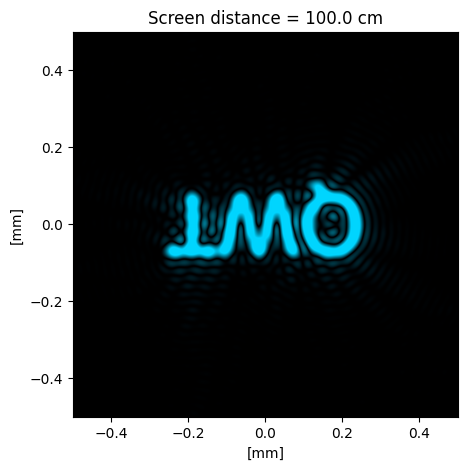

In [19]:
# optical_imaging_system_using_convolution.py

import diffractsim
diffractsim.set_backend("CUDA")
from diffractsim import MonochromaticField,ApertureFromImage, nm, mm, cm,um, CircularAperture

zi = 50*cm # distance from the image plane to the lens
z0 = 50*cm # distance from the lens to the current position
M = -zi/z0 # magnification factor
radius = 6*mm
NA = radius  / z0  #numerical aperture

#print diffraction limit
print('\n Maximum object resolvable distance by Rayleigh criteria: {} mm'.format("%.3f"  % (0.61*488*nm/NA /mm)))


F = MonochromaticField(
    wavelength=488 * nm, extent_x=1.5 * mm, extent_y=1.5 * mm, Nx=2048, Ny=2048,intensity = 0.2
)

F.add(ApertureFromImage("./examples/apertures/QWT.png",  image_size = (1.0 * mm, 1.0 * mm), simulation = F))

F.propagate_to_image_plane(pupil = CircularAperture(radius = 6*mm) , M = M, zi = zi, z0 = z0)
rgb = F.get_colors()
F.plot_colors(rgb, figsize=(5, 5), xlim=[-0.5*mm,0.5*mm], ylim=[-0.5*mm,0.5*mm])


100% |#######################################################################################################################################################|


Computation Took 5.399274587631226


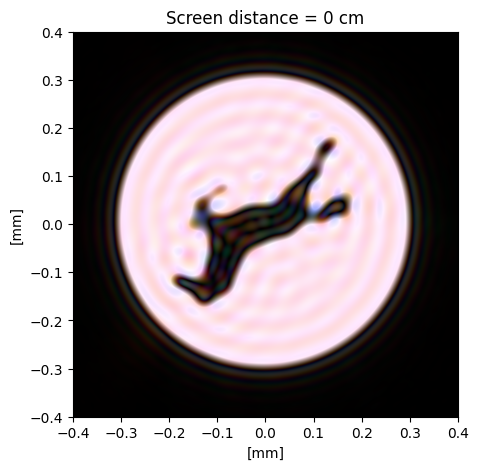

In [20]:
# optical_imaging_system_using_convolution__polychromatic.py

import diffractsim
diffractsim.set_backend("CUDA")

from diffractsim import PolychromaticField, ApertureFromImage, CircularAperture, cf, nm, mm, cm



F = PolychromaticField(
    spectrum=2 * cf.illuminant_d65, extent_x= 1.5 * mm, extent_y= 1.5 * mm, Nx=2048, Ny=2048,
    spectrum_size = 180, spectrum_divisions = 30
)


F.add(ApertureFromImage( "./examples/apertures/horse.png",  image_size=(1.0 * mm, 1.0 * mm), simulation = F))


zi = 50*cm # distance from the image plane to the exit pupil
z0 = 50*cm # distance from the exit pupil to the current simulation plane
M = -zi/z0 # magnification factor

rgb = F.get_colors_at_image_plane(pupil = CircularAperture(radius = 6*mm) ,M = M,  zi = zi, z0 = z0)

F.plot_colors(rgb, figsize=(5, 5), xlim=[-0.4*mm,0.4*mm], ylim=[-0.4*mm,0.4*mm])



 Maximum resolvable distance by Rayleigh criteria: 671 nm


100% |#######################################################################################################################################################|


Computation Took 6.966583251953125


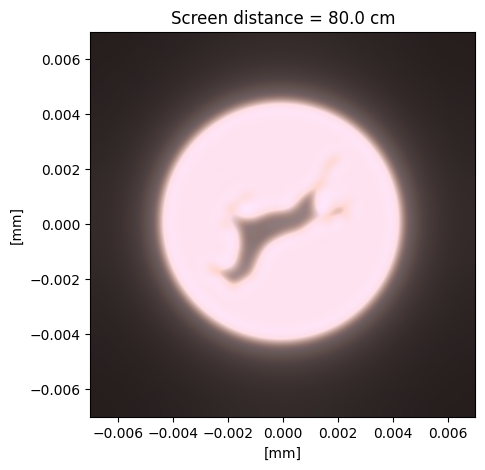

In [21]:
# optical_imaging_system_using_convolution__polychromatic_incoherent.py

import diffractsim
diffractsim.set_backend("CUDA")
import numpy as np
from diffractsim import PolychromaticField, ApertureFromImage, cf, mm, cm, CircularAperture

"""
MPL 2.0 License

Copyright (c) 2022, Rafael de la Fuente
All rights reserved.
"""


def get_colors_at_image_plane(F, radius, M,  zi, z0):
    from diffractsim.util.backend_functions import backend as bd
    from diffractsim.util.backend_functions import backend_name

    import numpy as np
    import time
    import progressbar
    """
    Assuming an incoherent optical system with linear response and assuming the system is only diffraction-limited by
    the exit pupil of the system, compute the field at its image plane

    
    Parameters
    ----------

    radius: exit pupil radius

    zi: distance from the image plane to the exit pupil
    z0: distance from the exit pupil to the current position

    M: magnification factor of the optical system
    (If the optical system is a single lens, magnification = - zi/z0)

    Reference:
    Introduction to Fourier Optics J. Goodman, Frequency Analysis of Optical Imaging Systems
    
    """
    pupil = CircularAperture(radius)
    F.z += zi + z0




    for j in range(len(F.optical_elements)):
        F.E = F.E * F.optical_elements[j].get_transmittance(F.xx, F.yy, 0)

    # if the magnification is negative, the image is inverted
    if M < 0:
        F.E = bd.flip(F.E)
    M_abs = bd.abs(M)

    F.E = F.E/M_abs

    Ip = F.E * bd.conjugate(F.E)
    
    fft_c = bd.fft.fft2(Ip)
    c = bd.fft.fftshift(fft_c)

    fx = bd.fft.fftshift(bd.fft.fftfreq(F.Nx, d = F.x[1]-F.x[0]))/M_abs
    fy = bd.fft.fftshift(bd.fft.fftfreq(F.Ny, d = F.y[1]-F.y[0]))/M_abs
    fx, fy = bd.meshgrid(fx, fy)
    fp = bd.sqrt(fx**2 + fy**2)

    bar = progressbar.ProgressBar()

    # We compute the pattern of each wavelength separately, and associate it to small spectrum interval dλ = (780- 380)/spectrum_divisions . We approximately the final colour
    # by summing the contribution of each small spectrum interval converting its intensity distribution to a RGB space.
    
    sRGB_linear = bd.zeros((3, F.Nx * F.Ny))

    t0 = time.time()

    for i in bar(range(F.spectrum_divisions)):
        #Definte the OTF function, representing the Fourier transform of the circular pupil function.

        fc = radius / (F.λ_list_samples[i]* nm  * zi) # coherent cutoff frequency

        H = pupil.get_optical_transfer_function(fx, fy, zi, F.λ_list_samples[i]* nm )
        #H = bd.where(fp < 2 * fc, 2/bd.pi * (bd.arccos(fp / (2*fc)) - fp / (2*fc) * bd.sqrt(1 - (fp / (2*fc))**2)) , bd.zeros_like(fp))
        Iλ = bd.abs(bd.fft.ifft2(bd.fft.ifftshift(c*H)))

        XYZ = F.cs.spec_partition_to_XYZ(bd.outer(Iλ, F.spec_partitions[i]),i)
        sRGB_linear += F.cs.XYZ_to_sRGB_linear(XYZ)

    if backend_name == 'cupy':
        bd.cuda.Stream.null.synchronize()

    F.xx = M_abs * F.xx
    F.yy = M_abs * F.yy
    F.x = M_abs * F.x
    F.y = M_abs * F.y
    F.dx = M_abs * F.dx
    F.dy = M_abs * F.dy

    rgb = F.cs.sRGB_linear_to_sRGB(sRGB_linear)
    rgb = (rgb.T).reshape((F.Ny, F.Nx, 3))
    print ("Computation Took", time.time() - t0)
    return rgb




from diffractsim import MonochromaticField, nm, mm, cm, um



zi = 40*cm # distance from the image plane to the exit pupil
z0 = 40*cm # distance from the exit pupil to the current simulation plane
pupil_radius = 20*cm # exit pupil radius

#(If the optical system is a single lens, magnification = - zi/z0)
M = -zi/z0
NA = pupil_radius/z0 #numerical aperture

#maximum resolvable distance by Rayleigh criteria for λ ∼ 550 nm:
print('\n Maximum resolvable distance by Rayleigh criteria: {} nm'.format("%.0f"  % (0.61*550/NA)))



#set up the simulation

F = PolychromaticField(
    spectrum=2*M**2* cf.illuminant_d65, extent_x= 14 * um, extent_y= 14 * um, Nx=2048, Ny=2048,
    spectrum_size = 180, spectrum_divisions = 30
)
F.add(ApertureFromImage( "./examples/apertures/horse.png",  image_size=(14 * um, 14 * um), simulation = F))

#propagate the light assuming the source is spatially incoherent
rgb = get_colors_at_image_plane(F,radius = pupil_radius, zi = zi, z0 = z0, M = M)

F.plot_colors(rgb, figsize=(5, 5))


100% |#######################################################################################################################################################|


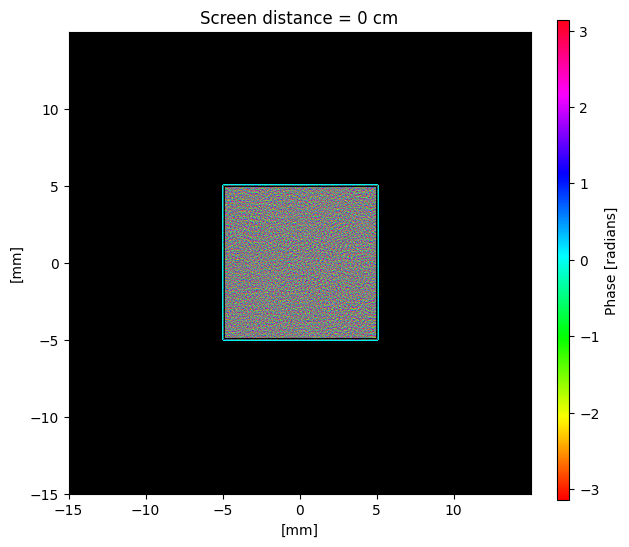

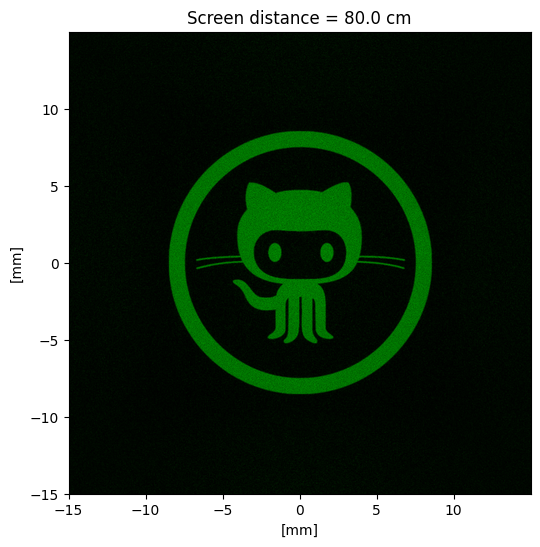

In [22]:
# phase_hologram_github_logo_generation_and_reconstruction.py

import diffractsim
diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import MonochromaticField, ApertureFromImage, Lens, mm, nm, cm, FourierPhaseRetrieval


# Generate a Fourier plane phase hologram
PR = FourierPhaseRetrieval(target_amplitude_path = './examples/apertures/github_logo.png', new_size= (400,400), pad = (200,200))
PR.retrieve_phase_mask(max_iter = 200, method = 'Conjugate-Gradient')
PR.save_retrieved_phase_as_image('github_logo_phase_hologram.png')


#Add a plane wave
F = MonochromaticField(
    wavelength=532 * nm, extent_x=30 * mm, extent_y=30 * mm, Nx=2400, Ny=2400, intensity = 0.005
)


# load the hologram as a phase mask aperture
F.add(ApertureFromImage(
     amplitude_mask_path= "./examples/apertures/white_background.png", 
     phase_mask_path= "github_logo_phase_hologram.png", image_size=(10.0 * mm, 10.0 * mm), simulation = F))

# plot colors at z = 0
rgb = F.get_field()
F.plot_phase(rgb)

# propagate field to Fourier plane
F.add(Lens(f = 80*cm))
F.propagate(80*cm)


# plot colors (reconstructed image) at z = 80*cm (Fourier plane)
rgb = F.get_colors()
F.plot_colors(rgb)


100% |#######################################################################################################################################################|


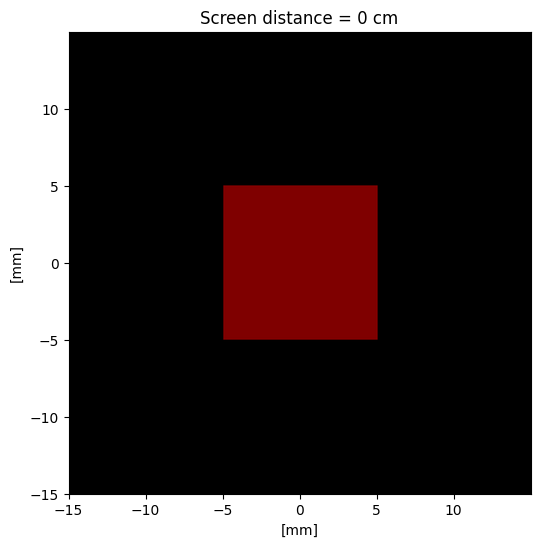

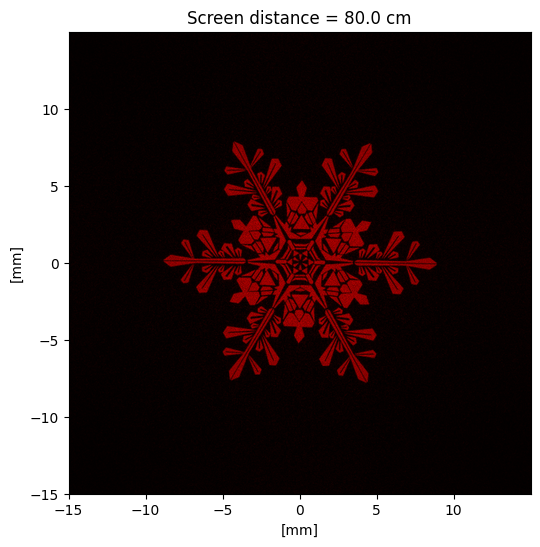

In [23]:
# phase_hologram_snowflake_generation_and_reconstruction.py

import diffractsim
diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import MonochromaticField, ApertureFromImage, Lens, mm, nm, cm, FourierPhaseRetrieval


# Generate a Fourier plane phase hologram
PR = FourierPhaseRetrieval(target_amplitude_path = './examples/apertures/snowflake.png', new_size= (400,400), pad = (200,200))
PR.retrieve_phase_mask(max_iter = 200, method = 'Conjugate-Gradient')
PR.save_retrieved_phase_as_image('snowflake_phase_hologram.png')


#Add a plane wave
F = MonochromaticField(
    wavelength=632.8 * nm, extent_x=30 * mm, extent_y=30 * mm, Nx=2400, Ny=2400, intensity = 0.005
)


# load the hologram as a phase mask aperture
F.add(ApertureFromImage(
     amplitude_mask_path= "./examples/apertures/white_background.png", 
     phase_mask_path= "snowflake_phase_hologram.png", image_size=(10.0 * mm, 10.0 * mm), simulation = F))

# plot colors at z = 0
rgb = F.get_colors()
F.plot_colors(rgb)

# propagate field to Fourier plane
F.add(Lens(f = 80*cm))
F.propagate(80*cm)


# plot colors (reconstructed image) at z = 80*cm (Fourier plane)
rgb = F.get_colors()
F.plot_colors(rgb)


100% |#######################################################################################################################################################|


Computation Took 5.677861928939819


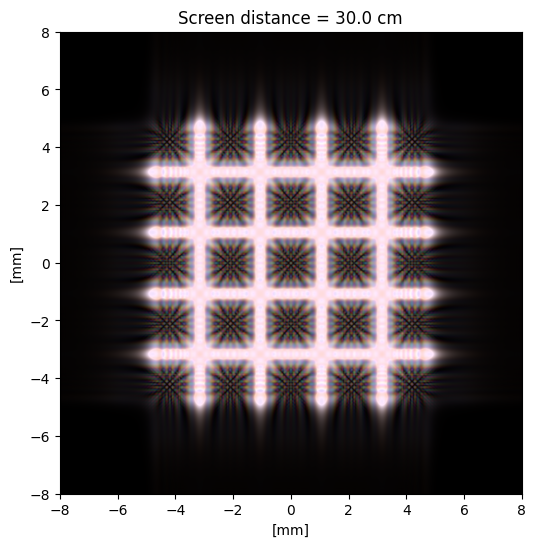

In [24]:
# rectangular_grating_big.py

import diffractsim
diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import PolychromaticField, ApertureFromImage, cf, mm, cm

F = PolychromaticField(
    spectrum=1 * cf.illuminant_d65,
    extent_x=16.0 * mm,
    extent_y=16.0 * mm,
    Nx=1500,
    Ny=1500,
)

F.add(ApertureFromImage("./examples/apertures/rectangular_grating.jpg",image_size = (10 * mm, 10 * mm), simulation = F))

F.propagate(30*cm)

rgb = F.get_colors()
F.plot_colors(rgb, xlim=[-8*mm, 8*mm], ylim=[-8*mm, 8*mm])


100% |#######################################################################################################################################################|


Computation Took 6.378071546554565


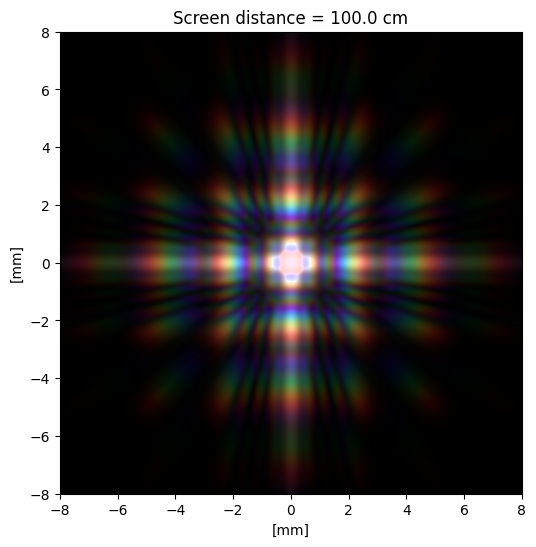

In [25]:
# rectangular_grating_small.py

import diffractsim
diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import PolychromaticField, ApertureFromImage, cf, mm, cm

F = PolychromaticField(
    spectrum=10 * cf.illuminant_d65,
    extent_x=30.0 * mm,
    extent_y=30.0 * mm,
    Nx=2048,
    Ny=2048,
)

F.add(ApertureFromImage("./examples/apertures/rectangular_grating.jpg",image_size = (1.2 * mm,1.2 * mm), simulation = F))

F.propagate(100*cm)

rgb = F.get_colors()
F.plot_colors(rgb, xlim=[-8*mm, 8*mm], ylim=[-8*mm, 8*mm])


100% |#######################################################################################################################################################|


Computation Took 7.500505447387695


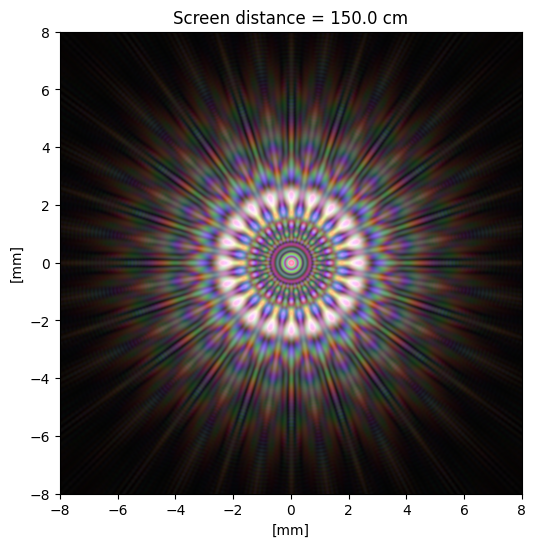

In [26]:
# rings.py

import diffractsim
diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import PolychromaticField,ApertureFromImage, cf, mm, cm

F = PolychromaticField(
    spectrum=1.5 * cf.illuminant_d65,
    extent_x=25.0 * mm,
    extent_y=25.0 * mm,
    Nx=1500,
    Ny=1500,
    spectrum_size = 200, spectrum_divisions = 40  # increase these values to improve color resolution
)

F.add(ApertureFromImage("./examples/apertures/rings.jpg", image_size = (12.0 * mm,12.0 * mm), simulation = F))


F.propagate(z=150*cm)
rgb = F.get_colors()
F.plot_colors(rgb, xlim=[-8*mm, 8*mm], ylim=[-8*mm, 8*mm])


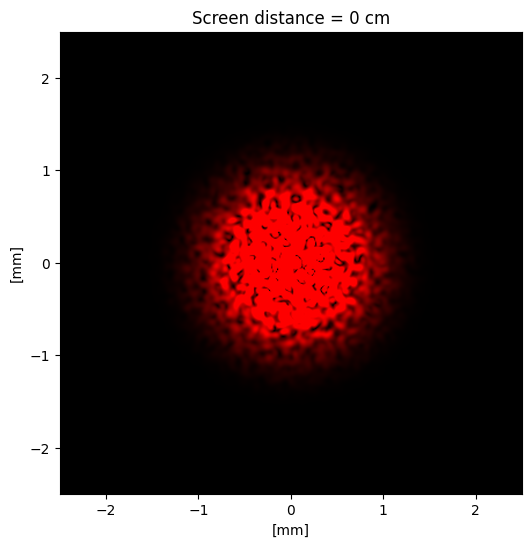

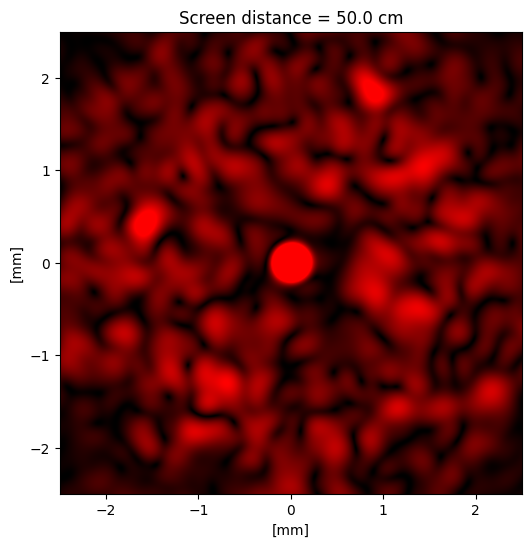

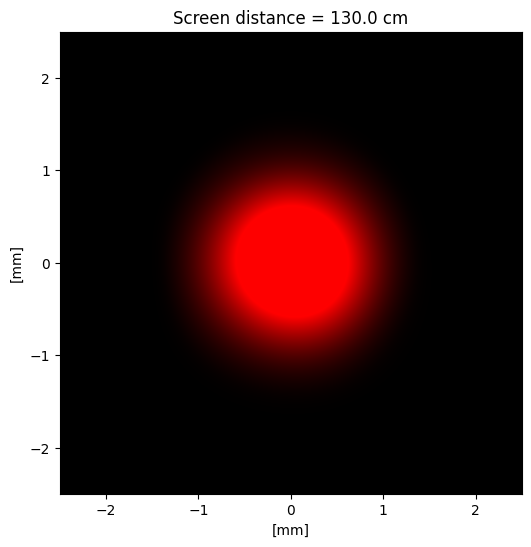

In [27]:
# spatial_filter.py

import diffractsim
diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import MonochromaticField, GaussianBeam, Lens, CircularAperture, SpatialNoise, nm, mm, cm

F = MonochromaticField(
    wavelength=632.8 * nm, extent_x=25. * mm, extent_y=25. * mm, Nx=2000, Ny=2000,intensity = 0.1
)


F.add(GaussianBeam(w0 = 0.7*mm))
F.add(SpatialNoise(noise_radius = 0.8*mm, f_mean = 1/(0.2*mm), f_spread = 1/(0.3*mm), A = 1, N= 50))

rgb = F.get_colors()
F.plot_colors(rgb, xlim=[-2.5*mm,2.5*mm], ylim=[-2.5*mm,2.5*mm])

F.add(Lens(f = 50*cm))
F.propagate(50*cm)

rgb = F.get_colors()
F.plot_colors(rgb, xlim=[-2.5*mm,2.5*mm], ylim=[-2.5*mm,2.5*mm])


F.add(CircularAperture(0.28*mm))
F.propagate(50*cm)
F.add(Lens(f = 50*cm))
F.propagate(30*cm)


rgb = F.get_colors()
F.plot_colors(rgb, xlim=[-2.5*mm,2.5*mm], ylim=[-2.5*mm,2.5*mm])


100% |#######################################################################################################################################################|


Computation Took 18.921892166137695


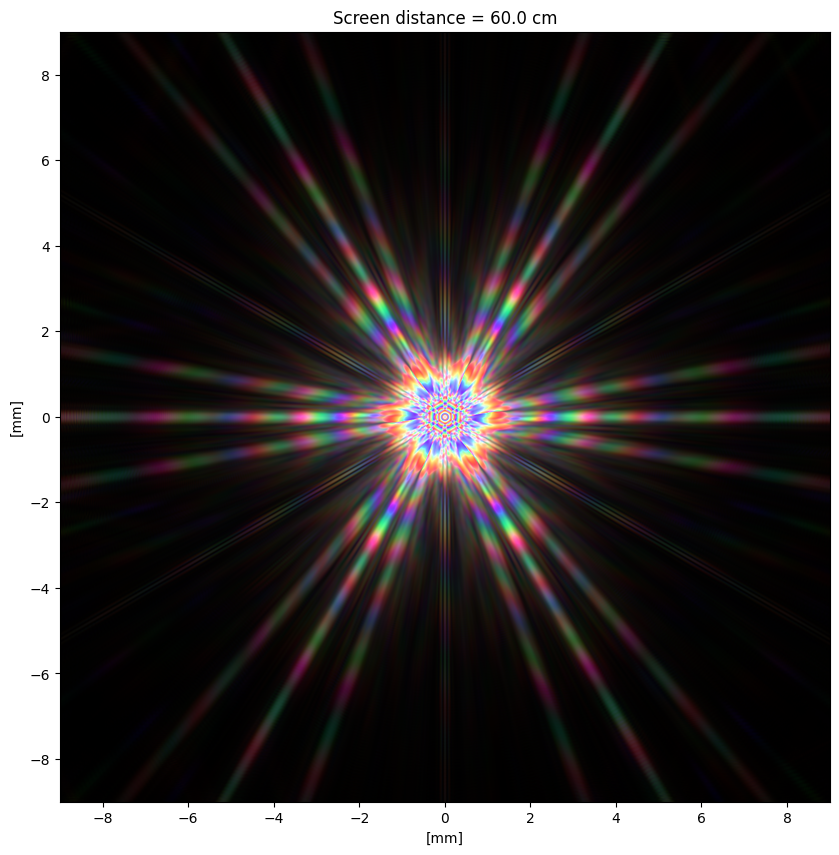

In [28]:
# tribahtinov_mask.py

import diffractsim
diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import PolychromaticField, Lens, ApertureFromImage, cf, nm, mm, cm

F = PolychromaticField(
    spectrum = 6*cf.illuminant_d65, 
    extent_x=24. * mm, extent_y=24. * mm, 
    Nx=2048, Ny=2048,spectrum_size = 240, spectrum_divisions = 80
)

F.add(ApertureFromImage("./examples/apertures/tribahtinov_mask.jpg", image_size=(5 * mm, 5 * mm), simulation = F))

F.add(Lens(f = 60*cm))
F.propagate(60*cm)

rgb =F.get_colors()
F.plot_colors(rgb, xlim=[-9*mm, 9*mm], ylim=[-9*mm, 9*mm], figsize = (10,10))


100% |#######################################################################################################################################################|


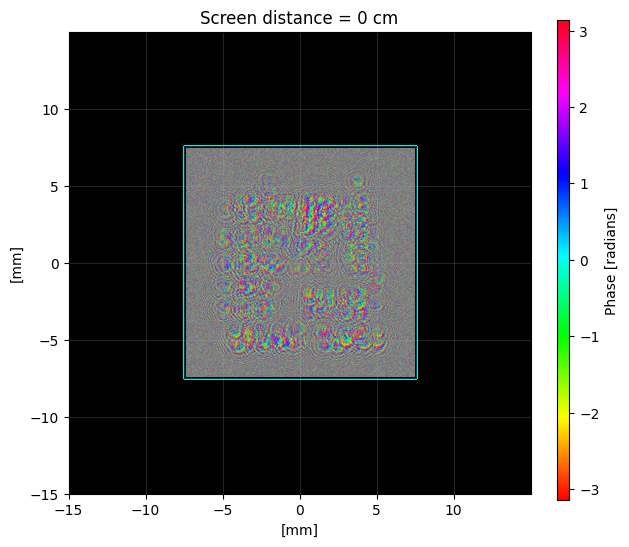

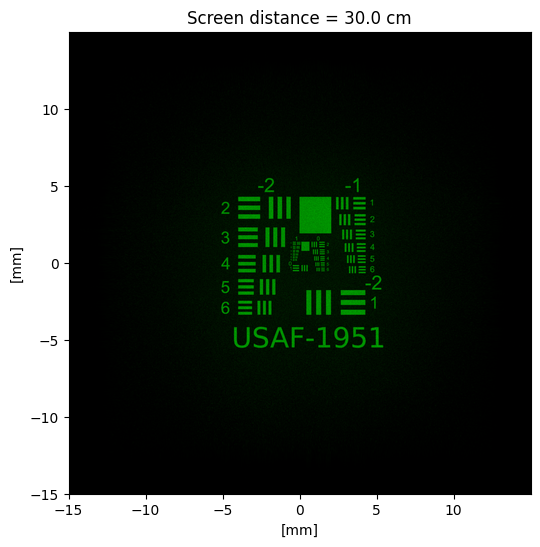

In [29]:
# usaf_30cm_phase_hologram_generation_and_reconstruction.py

import diffractsim
diffractsim.set_backend("JAX")

from diffractsim import MonochromaticField, mm, nm, cm, CustomPhaseRetrieval, ApertureFromImage


#Note: CustomPhaseRetrieval requires autograd which is not installed by default with diffractsim. 
# To install autograd, type: 'pip install -U jax'


# Generate a 30cm plane phase hologram
distance = 30*cm
PR = CustomPhaseRetrieval(wavelength=532 * nm, z = distance, extent_x=30 * mm, extent_y=30 * mm, Nx=2048, Ny=2048)

PR.set_source_amplitude(amplitude_mask_path= "./examples/apertures/white_background.png", image_size=(15.0 * mm, 15.0 * mm))
PR.set_target_amplitude(amplitude_mask_path= "./examples/apertures/USAF_test.png", image_size=(15.0 * mm, 15.0 * mm))

PR.retrieve_phase_mask(max_iter = 15, method = 'Adam-Optimizer')
PR.save_retrieved_phase_as_image('USAF_hologram.png')



#Add a plane wave

F = MonochromaticField(
    wavelength=532 * nm, extent_x=30 * mm, extent_y=30 * mm, Nx=2048, Ny=2048, intensity = 0.001
)


F.add(ApertureFromImage(
     amplitude_mask_path= "./examples/apertures/white_background.png", 
     image_size=(15.0    * mm, 15.0  * mm), simulation = F)
)



F.add(ApertureFromImage(
     phase_mask_path= "USAF_hologram.png", 
     image_size=(30.0   * mm, 30.0 * mm), simulation = F)
)



# plot phase at z = 0
E = F.get_field()
F.plot_phase(E, grid = True, units = mm)

# propagate field 30*cm
F.propagate(distance)


# plot reconstructed image
rgb = F.get_colors()
F.plot_colors(rgb)
